# 1. tensorflow v2.xx 에서 v1 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2 비활성화 하고 v1을 활성화

## Tensorflow 란
- 그래프 정의 (tensor 객체의 흐름)
- sess = tf.Session() 을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [6]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensor')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensor'
Hello, Tensor


In [7]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [8]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [10]:
# 평균값 계산 tf.reduce_() 
data = np.array([1., 2, 3, 4])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

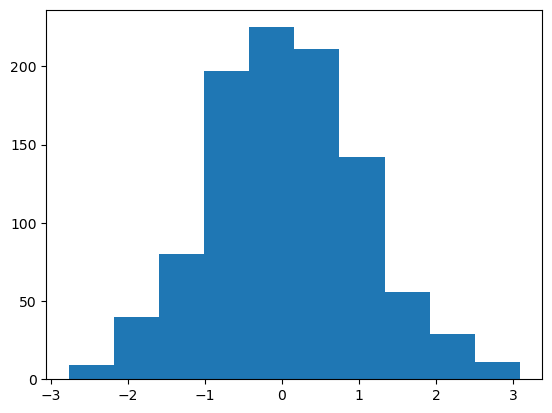

In [16]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수: 독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2(정규분포 난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1 을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [22]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3]) # y = 1*x+0

# weight 와  bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis : 결과는 넘파이 배열
H = W*x + b

# cost sunction (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
 학습 목적 : cost 가 최소가 되는 W, b를 찾는 것
 cost 함수는 2차 함수이므로 곡선 그래프, 곡선위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
sess.run([W, b])

# 6000번 학습 시키기 (v2에서의 fit 함수 해당)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print(f'{step}번째 cost:{cost_val}, W:{W_val}, b:{b_val}')

0번째 cost:2.733863592147827, W:[-0.00098962], b:[0.5646634]
300번째 cost:0.09131675213575363, W:[0.6331552], b:[0.7736898]
600번째 cost:0.07622954994440079, W:[0.6785574], b:[0.72859395]
900번째 cost:0.06598600745201111, W:[0.70162535], b:[0.6782011]
1200번째 cost:0.05712200328707695, W:[0.722413], b:[0.6310179]
1500번째 cost:0.04944873973727226, W:[0.74173015], b:[0.5871078]
1800번째 cost:0.042806174606084824, W:[0.7597025], b:[0.5462526]
2100번째 cost:0.037055883556604385, W:[0.77642417], b:[0.50824]
2400번째 cost:0.032078128308057785, W:[0.7919822], b:[0.4728733]
2700번째 cost:0.027768999338150024, W:[0.80645764], b:[0.43996742]
3000번째 cost:0.0240387711673975, W:[0.81992555], b:[0.40925315]
3300번째 cost:0.02080960012972355, W:[0.8324564], b:[0.38086602]
3600번째 cost:0.018014226108789444, W:[0.8441152], b:[0.35436273]
3900번째 cost:0.01559435110539198, W:[0.85496265], b:[0.3297038]
4200번째 cost:0.013499528169631958, W:[0.8650554], b:[0.3067606]
4500번째 cost:0.011686135083436966, W:[0.8744458], b:[0.28541422]

In [23]:
# 최종적으로 나온 회귀식 H = W*x + b
sess.run([W, b])

[array([0.9124802], dtype=float32), array([0.198953], dtype=float32)]

In [24]:
W_, b_ = sess.run([W, b])
W_, b_

(array([0.9124802], dtype=float32), array([0.198953], dtype=float32))

In [25]:
print(f'최종 회귀식 : H = {W_[0]}*x + {b_[0]}')

최종 회귀식 : H = 0.9124801754951477*x + 0.19895300269126892


In [26]:
def to_predict(x):
    return W_[0]*x + b_[0]

In [28]:
to_predict(3)

2.936393529176712

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력 받을수 있는 노드

In [29]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run(ab, feed_dict={a: 10, b: 20})

30.0

In [30]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                       b:np.array([1,2,3])})

array([2., 4., 6.], dtype=float16)

In [34]:
# data set
x_data = np.array([1,2,3])
y_data = np.array([2,4,6])

# placeholder 설정(x, y)

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')

# Hypothesis
H = W*x + b

# cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))

#경사 하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(6000):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data,
                                                                        y:y_data})
    if step % 200 == 0:
        print(f'{step+1}/6000번째 \n cost:{cost_val} \n W:{W_val}, b:{b_val}')

1/6000번째 
 cost:75.75891876220703 
 W:[-1.836082], b:[-0.44870898]
201/6000번째 
 cost:1.0128215551376343 
 W:[1.201812], b:[0.8295086]
401/6000번째 
 cost:0.13757313787937164 
 W:[1.5462768], b:[0.9256122]
601/6000번째 
 cost:0.11593087762594223 
 W:[1.6005552], b:[0.89666486]
801/6000번째 
 cost:0.10519696027040482 
 W:[1.6228508], b:[0.85612804]
1001/6000번째 
 cost:0.09555027633905411 
 W:[1.6409373], b:[0.8161029]
1201/6000번째 
 cost:0.0867893174290657 
 W:[1.657835], b:[0.7778075]
1401/6000번째 
 cost:0.07883163541555405 
 W:[1.673903], b:[0.7412939]
1601/6000번째 
 cost:0.07160360366106033 
 W:[1.6892126], b:[0.7064927]
1801/6000번째 
 cost:0.06503834575414658 
 W:[1.7038028], b:[0.6733254]
2001/6000번째 
 cost:0.059075113385915756 
 W:[1.7177083], b:[0.6417152]
2201/6000번째 
 cost:0.053658485412597656 
 W:[1.730961], b:[0.61158895]
2401/6000번째 
 cost:0.04873858392238617 
 W:[1.7435913], b:[0.5828768]
2601/6000번째 
 cost:0.04426974430680275 
 W:[1.7556288], b:[0.5555128]
2801/6000번째 
 cost:0.0402107

In [35]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([9.705768], dtype=float32)

In [36]:
sess.run(H, feed_dict={x: np.array([5,6,7])})

array([ 9.705768, 11.597862, 13.489957], dtype=float32)

## 2.3 scale 이 다른 데이터들 linear regression 구현

In [38]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))

#Hypothesis 
H = W*x + b

#cost function ( loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data,
                                                                        y:y_data})
    if step%300 == 1:
        print(f'{step}/6000번째 cost:{cost_val}, W:{W_val}, b:{b_val}')

1/6000번째 cost:3565.858642578125, W:[0.6024789], b:[0.349718]
301/6000번째 cost:79.16793060302734, W:[10.118478], b:[0.07514603]
601/6000번째 cost:79.1402587890625, W:[10.152965], b:[-0.18020935]
901/6000번째 cost:79.13948059082031, W:[10.158713], b:[-0.2227767]
1201/6000번째 cost:79.13946533203125, W:[10.159673], b:[-0.22987255]
1501/6000번째 cost:79.13946533203125, W:[10.159832], b:[-0.23105511]
1801/6000번째 cost:79.13944244384766, W:[10.159859], b:[-0.23125197]
2101/6000번째 cost:79.13946533203125, W:[10.159862], b:[-0.2312807]
2401/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
2701/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3001/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3301/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3601/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
3901/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
4201/6000번째 cost:79.13945770263672, W:[10.1598625], b:[-0.23128414]
4

In [39]:
# 예측
sess.run(H, feed_dict={x:5})

array([50.568027], dtype=float32)

In [40]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression을 구형(조정 O)
### scale 을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 데이터의 최대값을 1, 최소값을 0으로 변환
                      x - Xmin
    * normalization = ────────────        공식
                      Xmax - Xmin
    * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
    
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                       x - Xmaen(평균
    * standerdization = ────────────       공식
                        Xstd(표준편차)
    * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [42]:
# 라이브러리를 사용하지않고 정규화 : 예측할 경우 x데이터의 스케일변환, 스케일된 예측값을 변환이 번거롭다
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [43]:
x = (5 - x_data.min()) / (x_data.max() - x_data.min())
x

0.4444444444444444

In [45]:
0.7 * (y_data.max() - y_data.min())+y_data.min()

68.0

In [52]:
# 라이브러리를 사용한 정규화
x_data = np.array([1,2,5,8,10])
print('기존 x 데이터 :', x_data)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화 시킬 객체
scaler_x.fit(x_data)
scaler_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler()
scaler_y.fit(y_data)
scaler_y_data = scaler_y.transform(y_data)

np.column_stack([x_data, scaler_x_data, y_data, scaler_y_data])

기존 x 데이터 : [ 1  2  5  8 10]


array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [57]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))

#Hypothesis 
H = W*x + b

#cost function ( loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10202):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:scaler_x_data,
                                                                        y:scaler_y_data})
    if step%300 == 1:
        print(f'{step}/n번째 cost:{cost_val} \n W:{W_val}, b:{b_val}')

1/n번째 cost:7.686868190765381 
 W:[-1.9702529], b:[-1.077999]
301/n번째 cost:2.0621936321258545 
 W:[-1.2543155], b:[-0.02773573]
601/n번째 cost:0.7604541182518005 
 W:[-0.8578092], b:[0.4383611]
901/n번째 cost:0.4312664568424225 
 W:[-0.6162796], b:[0.6302594]
1201/n번째 cost:0.3245580792427063 
 W:[-0.45168763], b:[0.6944088]
1501/n번째 cost:0.27192431688308716 
 W:[-0.32688147], b:[0.6999384]
1801/n번째 cost:0.23513741791248322 
 W:[-0.2240612], b:[0.67942095]
2101/n번째 cost:0.20515823364257812 
 W:[-0.13459529], b:[0.64814675]
2401/n번째 cost:0.17953920364379883 
 W:[-0.05420196], b:[0.6132413]
2701/n번째 cost:0.15736287832260132 
 W:[0.01932987], b:[0.577977]
3001/n번째 cost:0.13810200989246368 
 W:[0.08721953], b:[0.5438086]
3301/n번째 cost:0.12135884910821915 
 W:[0.1502054], b:[0.51133937]
3601/n번째 cost:0.1068011075258255 
 W:[0.20878756], b:[0.4807751]
3901/n번째 cost:0.09414275735616684 
 W:[0.2633433], b:[0.45213825]
4201/n번째 cost:0.08313582837581635 
 W:[0.31418213], b:[0.42537034]
4501/n번째 cost:0

In [74]:
# 예측
scaled_input = scaler_x.transform(np.array([[2]]))
print('2가 스케일 조정된 값 :',scaled_input)
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('예측값 :', scaler_y.inverse_transform(scaled_output))

2가 스케일 조정된 값 : [[0.11111111]]
예측값 : [[26.596733]]


In [82]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x : scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[  5.        ,  20.75369453],
       [ 15.        ,  29.58906555],
       [ 68.        ,  56.09518814],
       [ 80.        ,  82.60131073],
       [ 95.        , 100.27205658]])

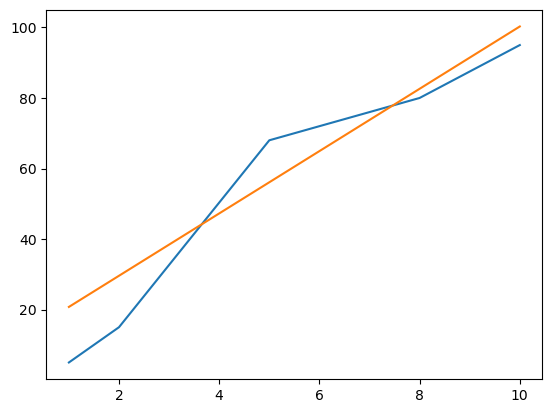

In [83]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)

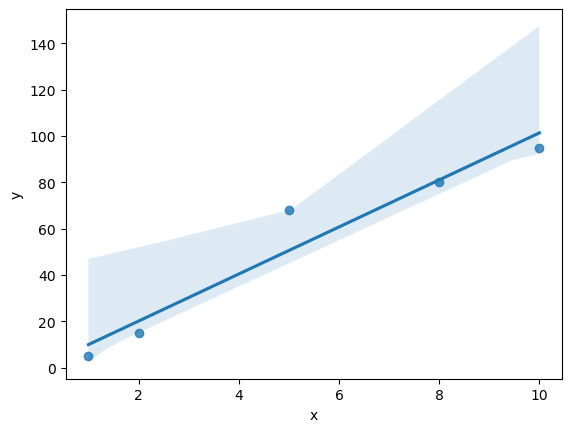

In [76]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],
                  'y':y_data[:,0]})
sns.regplot(data=df,
           x='x',
           y='y')
plt.show()

In [79]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([scaled_x_data, scaled_y_data])

array([[-1.22474487, -1.32373476],
       [-0.93313895, -1.04563922],
       [-0.05832118,  0.42826713],
       [ 0.81649658,  0.76198177],
       [ 1.39970842,  1.17912508]])

In [86]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([5,15,68,80,95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data 를 표준화할 객채
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler()
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [91]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))

#Hypothesis 
H = W*x + b

#cost function ( loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10002):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:scaler_x_data,
                                                                        y:scaler_y_data})
    if step%1000 == 1:
        print(f'{step}/n번째 cost:{cost_val}, W:{W_val}, b:{b_val}')

1/n번째 cost:0.8611376881599426, W:[-0.12135419], b:[1.4001153]
1001/n번째 cost:0.20859646797180176, W:[-0.10324202], b:[0.7072864]
2001/n번째 cost:0.13226261734962463, W:[0.11138033], b:[0.5376199]
3001/n번째 cost:0.08662296831607819, W:[0.29790187], b:[0.43446174]
4001/n번째 cost:0.05799790099263191, W:[0.44701865], b:[0.35531777]
5001/n번째 cost:0.04003481939435005, W:[0.56525654], b:[0.29283464]
6001/n번째 cost:0.02876237966120243, W:[0.65893], b:[0.2433547]
7001/n번째 cost:0.021688487380743027, W:[0.7331368], b:[0.2041596]
8001/n번째 cost:0.01724938675761223, W:[0.791921], b:[0.17311044]
9001/n번째 cost:0.014463667757809162, W:[0.8384887], b:[0.14851409]
10001/n번째 cost:0.012715555727481842, W:[0.8753778], b:[0.12902954]


## 2.5 독립변수 x가 여러개인 linear Regression

In [3]:
import pandas as pd

## csv를 array로 읽어오기

In [6]:
# 방법1 : csv -> 데이터프레임 -> 넘파이배열
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
data.dropna(how='any', axis=0, inplace=True)
X = data[['Solar.R', 'Wind','Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 3), (111,))

In [8]:
# 방법2 : csv -> 넘파이배열
import numpy as np
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',', skiprows=1)
data = np.genfromtxt('data/ozone.csv', delimiter=',', skip_header=1,
                    missing_values='NA', filling_values=np.nan)
data

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [1]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality').data
airquility.to_csv('XXX.csv', index=False)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
